# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.

 The proportion of people who survive in the control group who do not receive a transplant is 0.1176. The difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group 0.2302

2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.

The constant (0.1176) represents the average survival rate for the control group, meaning about 11.8% of people who did not receive a transplant survived. The coefficient on transplant (0.2302) shows that the treatment group’s survival rate was about 23 percentage points higher than the control group. These match the values you found in part 1: the control group’s survival proportion equals the intercept, and the difference between treatment and control (the average treatment effect) equals the transplant coefficient. In other words, the regression reproduces your earlier results in a linear model form.

3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?

When age is added to the model, the intercept increases from about 0.12 to about 0.70. This change happens because the intercept now represents the predicted survival rate for someone who did not receive a transplant and has an age of zero. Since age cannot actually be zero, the intercept no longer reflects a realistic average survival rate. Instead, it adjusts upward to account for the new variable and to fit the data more accurately once age is included in the model.

4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.

The plot shows predicted survival probabilities by age for people who did and did not receive a heart transplant. Both groups have higher predicted survival at younger ages, peaking around middle age before declining. However, transplant recipients have consistently higher survival probabilities across all ages, with their curve lying above the no-transplant group. This suggests that receiving a transplant improves the chances of survival overall, but the benefit is greatest for younger to middle-aged patients and decreases as age increases.

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

Using predictive models to decide who receives organ transplants raises major ethical, scientific, and social concerns. From what we’ve learned in earlier questions, models are only as good as the data and assumptions behind them. If the data used to train them reflect past inequalities in healthcare access, those biases will carry into future decisions. The model could favor patients who look like those already prioritized rather than those who would benefit most. It also risks mistaking correlation for causation, since survival patterns depend on factors like follow-up care, social support, and resources—not just medical condition.

0.11764705882352941
0.23017902813299232
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Sun, 05 Oct 2025   Prob (F-statistic):             0.0133
Time:                        19:20:39   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

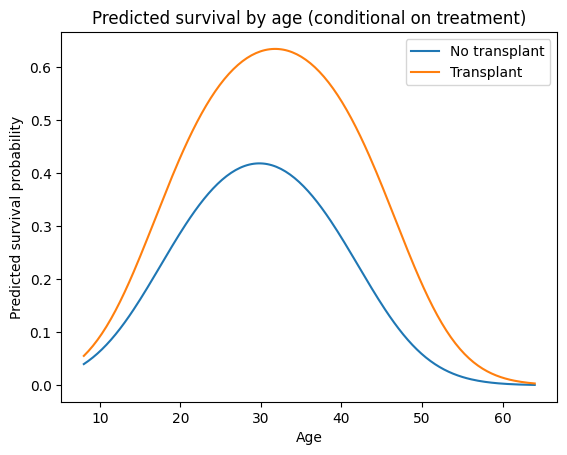

In [ ]:
import os
import pandas as pd

# Q1
# Load data
df = pd.read_csv("data/heart_hw.csv")

# Ensure y is numeric (0=death, 1=survival)
df["y"] = pd.to_numeric(df["y"], errors="coerce")

# Make a binary indicator: treat=1 if received a transplant, else 0
t = df["transplant"]
if t.dtype == object:
    yes = {"treatment", "transplant", "treat", "yes", "y", "1", "tx"}
    df["treat"] = t.astype(str).str.lower().isin(yes).astype(int)
else:
    df["treat"] = (t == 1).astype(int)

# Drop rows missing needed values
d = df.dropna(subset=["y", "treat"])

# (a) Proportion surviving in control group
p_control = d.loc[d["treat"] == 0, "y"].mean()

# Proportion surviving in treatment group
p_treat = d.loc[d["treat"] == 1, "y"].mean()

# (b) Average Treatment Effect (ATE)
ate = p_treat - p_control

print(p_control)
print(ate)

# Q2
import statsmodels.api as sm

# Coerce to numeric (handle labels like 'control'/'treatment', 'yes'/'no')
df["y"] = pd.to_numeric(df["y"], errors="coerce")
tx = df["transplant"].astype(str).str.strip().str.lower().map({
    "control":0, "no":0, "n":0, "0":0,
    "treatment":1, "treat":1, "yes":1, "y":1, "1":1
})
df["transplant"] = pd.to_numeric(tx, errors="coerce")

# Keep valid rows and ensure both groups exist
d = df.dropna(subset=["y", "transplant"])
d = d[d["y"].isin([0,1]) & d["transplant"].isin([0,1])]
if len(d) == 0 or d["transplant"].nunique() < 2:
    raise ValueError("Need nonempty data with both control (0) and treatment (1).")

# Regress y on transplant with a constant
X = sm.add_constant(d["transplant"].astype(float))
model = sm.OLS(d["y"].astype(float), X).fit()
print(model.summary())

# Q3
# Regress y on constant, transplant, and age
d["age"] = pd.to_numeric(d["age"], errors="coerce")
d = d.dropna(subset=["age"])

X = sm.add_constant(d[["transplant", "age"]])
model_age = sm.OLS(d["y"].astype(float), X).fit()
print(model_age.summary())

# Q4
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# ensure age present
d = d.dropna(subset=["age"])

# train-test split
X = d[["age", "transplant"]].to_numpy()
y = d["y"].to_numpy()
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# select best polynomial degree by CV on training
best_deg, best_score = None, -1
for deg in [1, 2, 3, 4]:
    pipe = Pipeline([
        ("poly", PolynomialFeatures(degree=deg, include_bias=False)),
        ("clf", LogisticRegression(max_iter=2000))
    ])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(pipe, X_tr, y_tr, scoring="roc_auc", cv=cv).mean()
    if score > best_score:
        best_deg, best_score = deg, score

# fit best model on training data
best_model = Pipeline([
    ("poly", PolynomialFeatures(degree=best_deg, include_bias=False)),
    ("clf", LogisticRegression(max_iter=2000))
]).fit(X_tr, y_tr)

# evaluate on test set
test_acc = best_model.score(X_te, y_te)
print(f"best_degree={best_deg}, cv_auc={best_score:.3f}, test_accuracy={test_acc:.3f}")

# predict across age grid for transplant=0 and transplant=1
age_grid = np.linspace(d["age"].min(), d["age"].max(), 200)
X0 = np.column_stack([age_grid, np.zeros_like(age_grid)])
X1 = np.column_stack([age_grid, np.ones_like(age_grid)])
p0 = best_model.predict_proba(X0)[:, 1]
p1 = best_model.predict_proba(X1)[:, 1]

# plot
plt.figure()
plt.plot(age_grid, p0, label="No transplant")
plt.plot(age_grid, p1, label="Transplant")
plt.xlabel("Age")
plt.ylabel("Predicted survival probability")
plt.title("Predicted survival by age (conditional on treatment)")
plt.legend()
plt.show()
